In [ ]:
'''
This file contains residual plots for first and second best and worst models
Display mean and standard deviation of the plots
'''

In [1]:
import pandas as pd
import seaborn as sns; sns.set_color_codes()
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from scipy.stats import kstest

In [2]:
def set_style(ax):
    i=0
    for x in ax:
    #     Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
#         print(i)
        if i==0:
            xlabel="Residuals for PQ"
        else:
            xlabel="Residuals for ATT"
        x.set_xlabel(xlabel,labelpad=20, weight='bold', size=12)
        i=i+1
        
        # Set y-axis label
    #     x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

        # Format y-axis label
#         x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    

Study2
---

In [ ]:
'''
STUDY1 performs better than study2

STUDY2
for PQ:
---Best---
1st - GA_Transformed_PCA_0.95 MARS
1st - GA_Transformed_PCA_0.80 MARS
2nd - 
---worst--
1st - 
2nd - 
'''

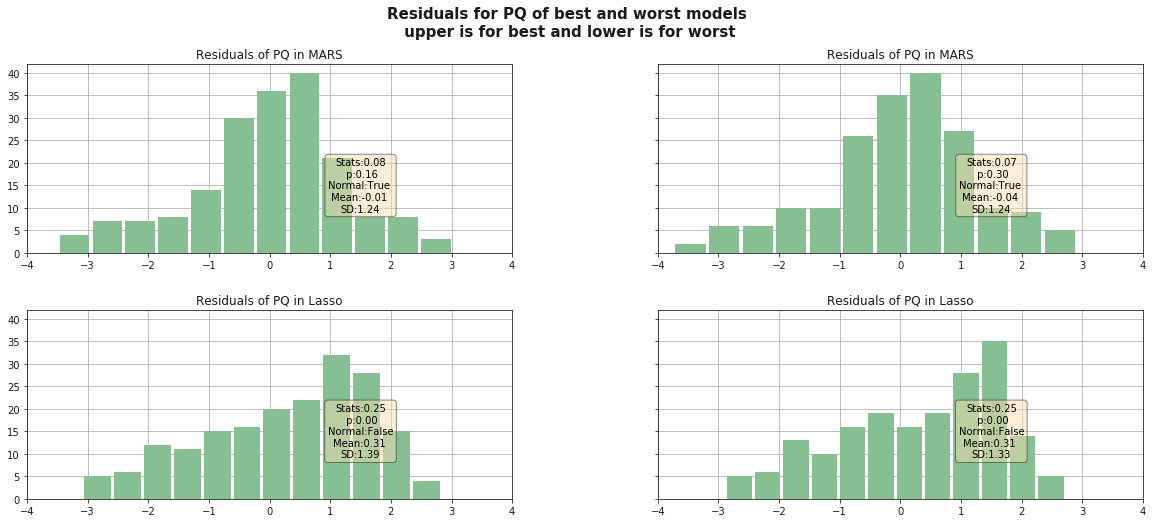

In [5]:
# for PQ

# best models
xl_best1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.95_predictions_unseen.xlsx',sheet_name='MARS')
xl_best2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions_unseen.xlsx',
                      sheet_name='MARS')

# worst models
xl_worst1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions_unseen.xlsx',sheet_name='Lasso Regression')
xl_worst2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_predictions_unseen.xlsx',sheet_name='Lasso Regression')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_best1['Residuals_PQ'],'norm')
mean = xl_best1['Residuals_PQ'].mean()
sd = xl_best1['Residuals_PQ'].std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of PQ in MARS')
ax[0][0].set_xlim((-4, 4))

stats, p = kstest(xl_best2['Residuals_PQ'].dropna(),'norm')
mean = xl_best2['Residuals_PQ'].mean()
sd = xl_best2['Residuals_PQ'].std()
xl_best2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of PQ in MARS')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_PQ'].mean()
sd = xl_worst1['Residuals_PQ'].std()
xl_worst1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][0].set_xlim((-4, 4))

xl_worst2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_worst2['Residuals_PQ'],'norm')
mean = xl_worst2['Residuals_PQ'].mean()
sd = xl_worst2['Residuals_PQ'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Lasso')
ax[1][1].set_title('Residuals of PQ in Lasso')

fig.suptitle("Residuals for PQ of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)

plt.show()

In [ ]:
'''for ATT:
---Best---
1st - SVM for GA_Transformed
2nd - SVM for GA_Transformed_PCA_0.95PC
---Worst--
1st - Elastic net GA_transformed
2nd - Elastic net GA_original'''

Text(0.5,0.98,'Residuals for ATT of best and worst models\n upper is for best and lower is for worst')

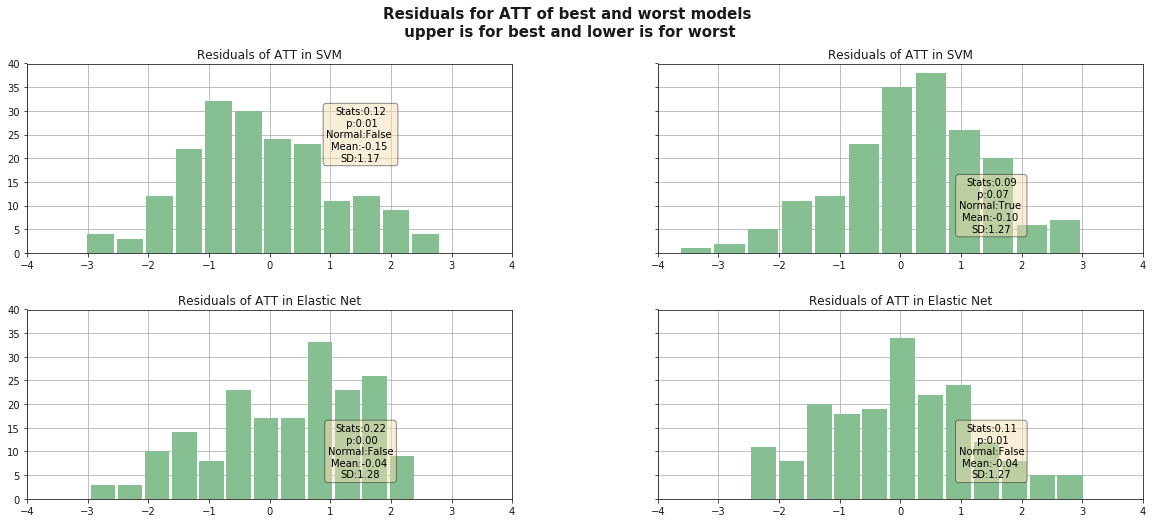

In [7]:
# for ATT

# best models
xl_best1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions_unseen.xlsx',sheet_name='SVM')

xl_best2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.95_predictions_unseen.xlsx',sheet_name='SVM')

# worst models
xl_worst1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions_unseen.xlsx',sheet_name='Elastic Net')
xl_worst2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_predictions_unseen.xlsx',sheet_name='Elastic Net')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_best1['Residuals_ATT'].dropna(),'norm')
mean = xl_best1['Residuals_ATT'].dropna().mean()
sd = xl_best1['Residuals_ATT'].dropna().std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of ATT in SVM')
ax[0][0].set_xlim((-4, 4))

stats, p = kstest(xl_best2['Residuals_ATT'],'norm')
mean = xl_best2['Residuals_ATT'].mean()
sd = xl_best2['Residuals_ATT'].std()
xl_best2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of ATT in SVM')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_ATT'].mean()
sd = xl_worst1['Residuals_ATT'].std()
xl_worst1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][0].set_xlim((-4, 4))
xl_worst2.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_worst2['Residuals_ATT'],'norm')
mean = xl_worst2['Residuals_ATT'].mean()
sd = xl_worst2['Residuals_ATT'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of ATT in Elastic Net')
ax[1][1].set_title('Residuals of ATT in Elastic Net')

fig.suptitle("Residuals for ATT of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)